##Importing Linbraries

In [ ]:
#Import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import os
import random
import albumentations as A
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

##Reading the Dataset

In [ ]:
# Load Legenda Annotations
df_legenda = pd.read_csv("/content/drive/MyDrive/DISSERATION1/lagenda_annotation.csv")  # Adjust path
dataset_path_legenda = r"/content/drive/MyDrive/DISSERATION1/lagenda_benchmark_images/lag_benchmark"



In [ ]:
df_legenda.head()

,img_name,age,gender,face_x0,face_y0,face_x1,face_y1,person_x0,person_y0,person_x1,person_y1
0,lag_benchmark/fbdead3926ba65c4.jpg,10,F,342,583,420,663,10,498,578,1272
1,lag_benchmark/0e36bcb471da5293.jpg,13,M,976,327,1100,413,20,155,1192,643
2,lag_benchmark/0e36bcb471da5293.jpg,-1,-1,1006,328,1102,480,-1,-1,-1,-1
3,lag_benchmark/46469833c3162cb9.jpg,-1,-1,-1,-1,-1,-1,635,300,653,328
4,lag_benchmark/46469833c3162cb9.jpg,-1,-1,-1,-1,-1,-1,1019,297,1063,392


In [ ]:
# Step 1: Replace -1 with NaN for age and gender columns in df_legenda
df_legenda['age'] = df_legenda['age'].replace(-1, np.nan)
df_legenda['gender'] = df_legenda['gender'].replace(-1, np.nan)

# Step 2: Handle 'gender' column
# For gender, let's map M -> 0, F -> 1, and fill NaN values with the mode
df_legenda['gender'] = df_legenda['gender'].map({'M': 0, 'F': 1})
df_legenda['gender'] = df_legenda['gender'].fillna(df_legenda['gender'].mode()[0])

# Step 3: Handle 'age' column
# For age, let's fill NaN values with the median of the 'age' column
df_legenda['age'] = df_legenda['age'].fillna(df_legenda['age'].median())

# Checking the cleaned DataFrame
print(df_legenda.head())

                             img_name   age  gender  face_x0  face_y0  \
0  lag_benchmark/fbdead3926ba65c4.jpg  10.0     1.0      342      583   
1  lag_benchmark/0e36bcb471da5293.jpg  13.0     0.0      976      327   
2  lag_benchmark/0e36bcb471da5293.jpg  37.0     1.0     1006      328   
3  lag_benchmark/46469833c3162cb9.jpg  37.0     1.0       -1       -1   
4  lag_benchmark/46469833c3162cb9.jpg  37.0     1.0       -1       -1   

   face_x1  face_y1  person_x0  person_y0  person_x1  person_y1  
0      420      663         10        498        578       1272  
1     1100      413         20        155       1192        643  
2     1102      480         -1         -1         -1         -1  
3       -1       -1        635        300        653        328  
4       -1       -1       1019        297       1063        392  


In [ ]:
#Read the dataset
dataset_path = '/content/drive/MyDrive/DISSERATION1/UTKFACE/UTKFace'

In [ ]:
# Age, Gender and img_path
age, gender, img_path = [], [], []

for file_name in os.listdir(dataset_path):
    details = file_name.split('_')
    age.append(int(details[0]))
    gender.append(int(details[1]))
    img_path.append(file_name)


In [ ]:
#Dataframe
df_uktface = pd.DataFrame({'age':age,'gender':gender,'img':img_path})

In [ ]:
#First 5 rows of dataset
df_uktface.head()

,age,gender,img
0,100,0,100_0_0_20170112213500903.jpg.chip.jpg
1,100,0,100_0_0_20170112215240346.jpg.chip.jpg
2,100,1,100_1_0_20170110183726390.jpg.chip.jpg
3,100,1,100_1_0_20170112213001988.jpg.chip.jpg
4,100,1,100_1_0_20170112213303693.jpg.chip.jpg


In [ ]:
#Dimension of dataset
df_uktface.shape

(23708, 3)

##Exploratory Data Analysis

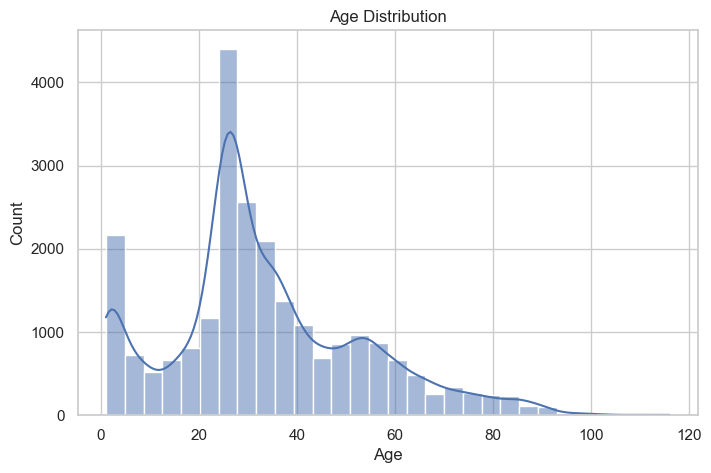

In [ ]:
#  Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_uktface['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


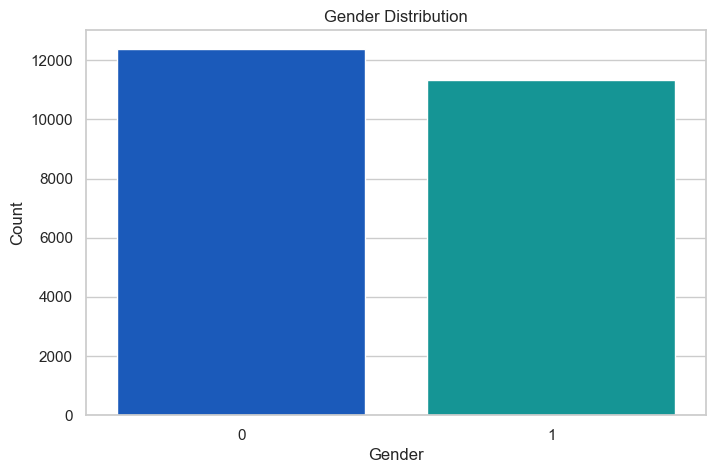

In [ ]:
#  Gender Distribution
sns.countplot(x='gender', data=df_uktface, palette='winter')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

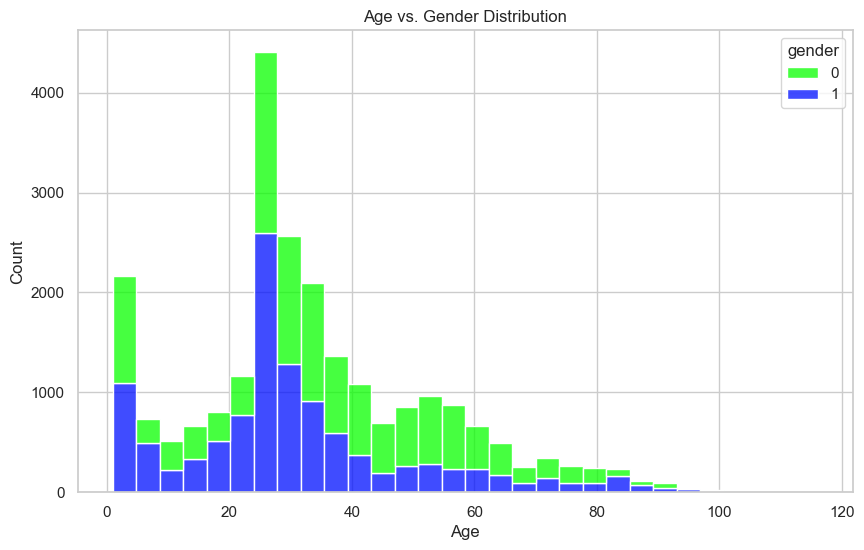

In [ ]:
#  Age vs. Gender Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_uktface, x='age', hue='gender', multiple='stack', bins=30, palette='hsv')
plt.title('Age vs. Gender Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

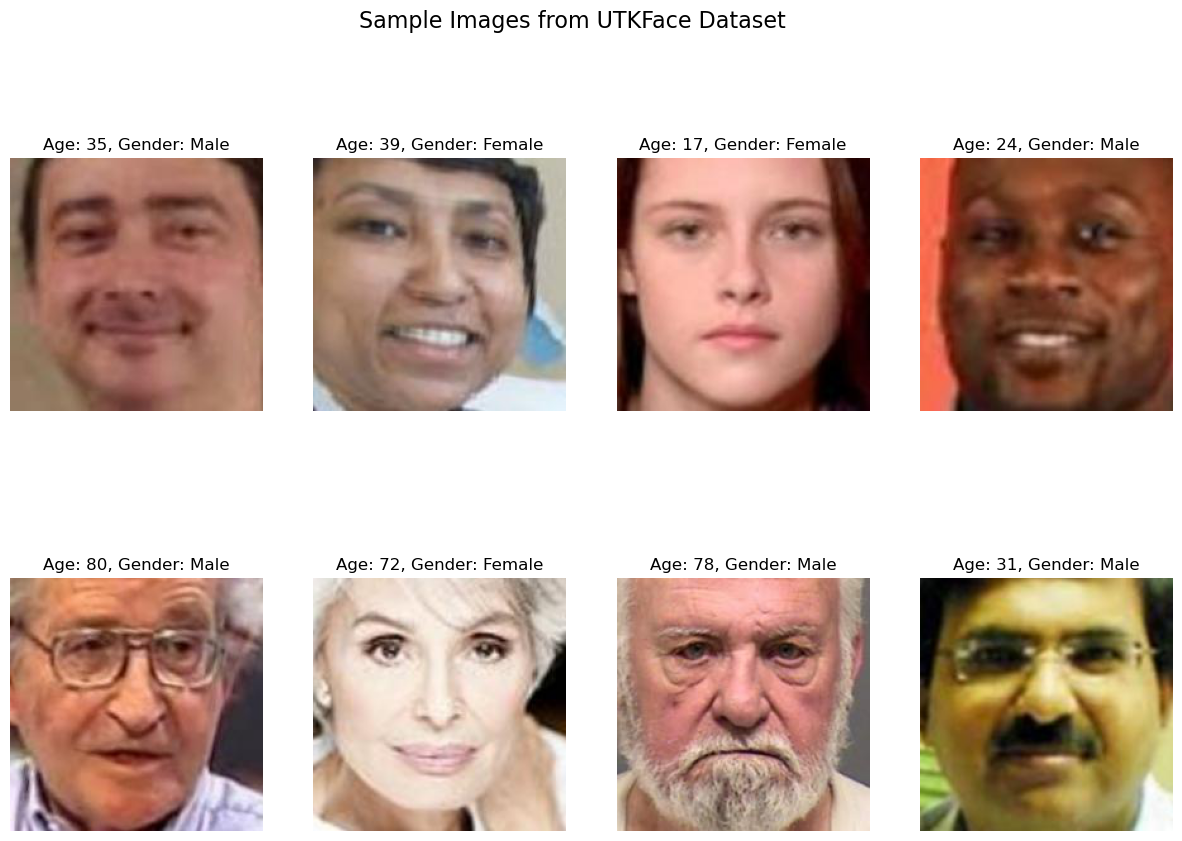

In [ ]:
#  Sample Image Grid (8 Images)
sample_files = random.sample(img_path, 8)
plt.figure(figsize=(15, 10))

for i, file_name in enumerate(sample_files, 1):
    details = file_name.split('_')
    img_age = details[0]
    img_gender = "Male" if details[1] == '0' else "Female"

    # Load and display the image
    img = Image.open(os.path.join(dataset_path, file_name))
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Age: {img_age}, Gender: {img_gender}')

plt.suptitle('Sample Images from UTKFace Dataset', fontsize=16)
plt.show()

In [ ]:
# Drop the missing value
df_uktface = df_uktface[df_uktface['age'].notna()]
df_uktface = df_uktface[df_uktface['age'] >= 0]

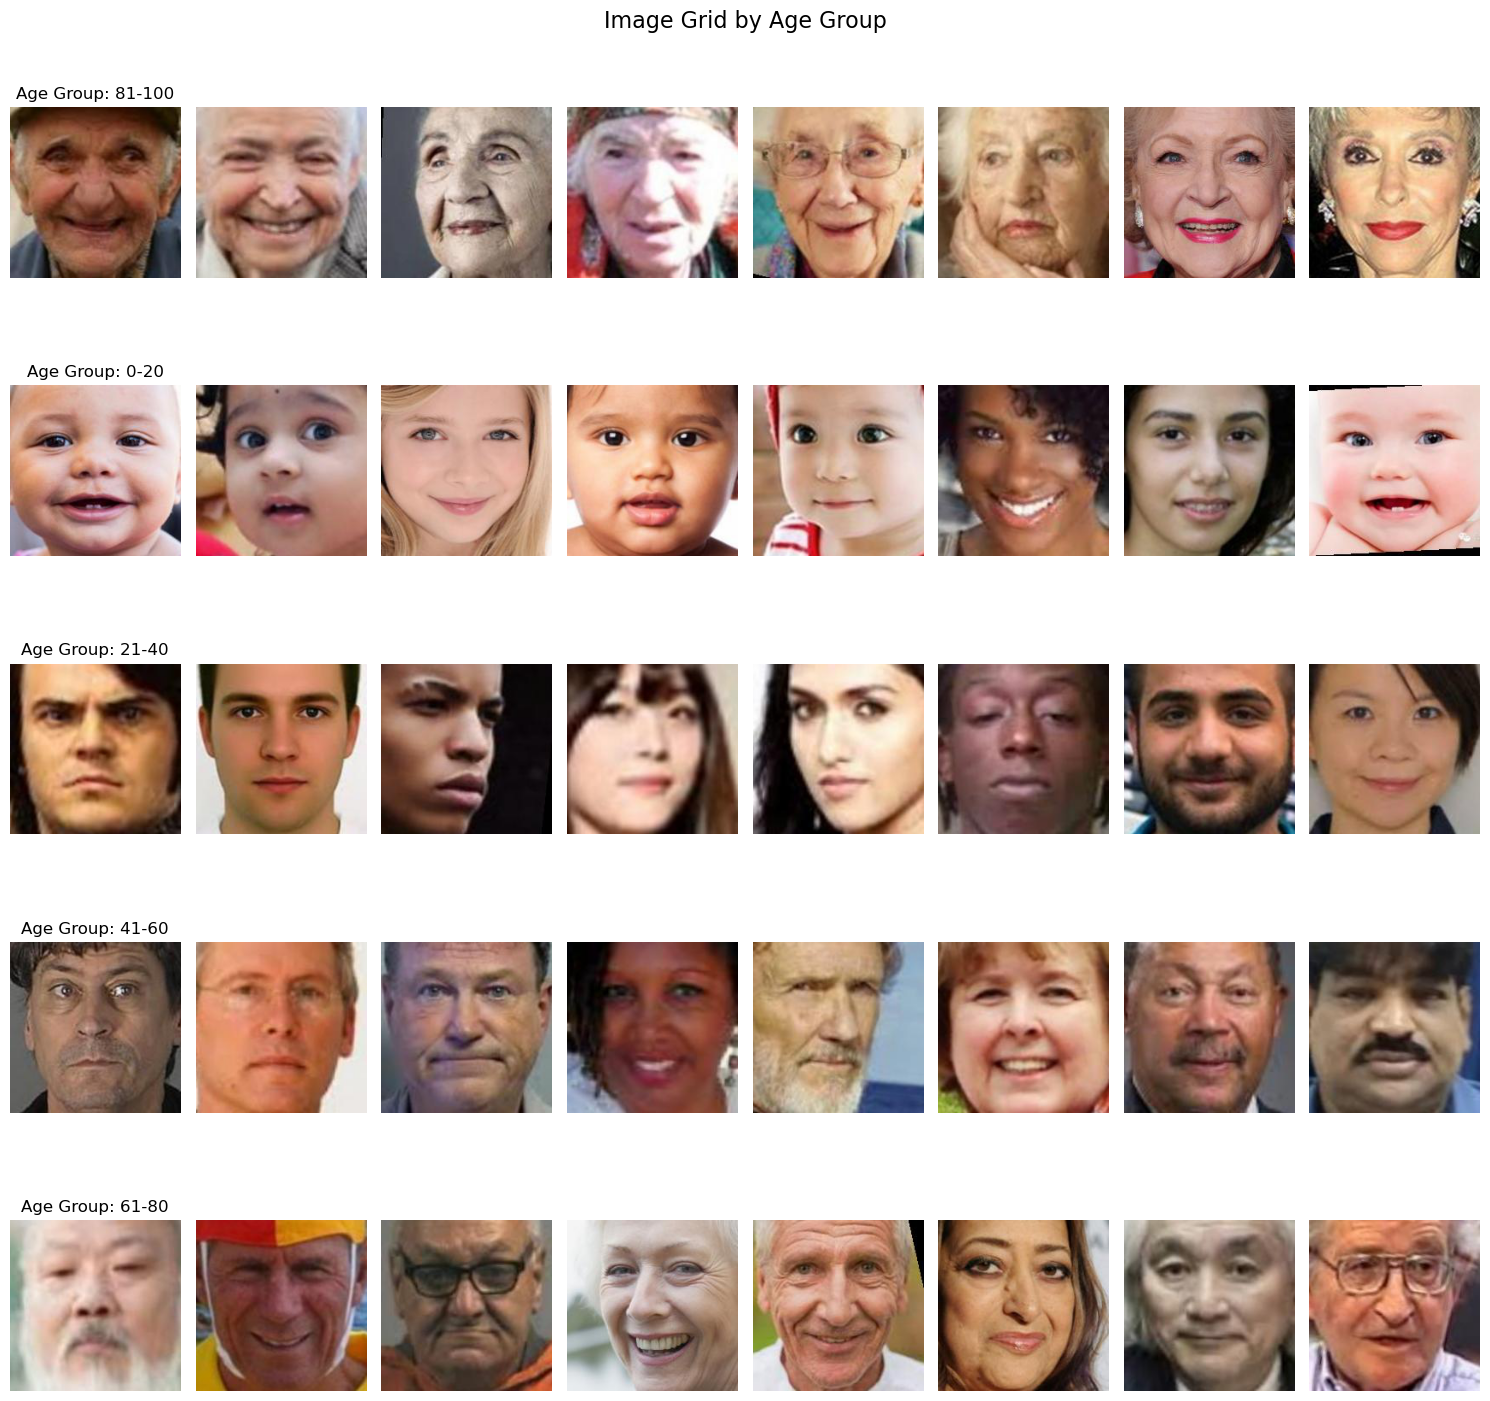

In [ ]:
  # Define age groups
age_bins = pd.cut(df_uktface['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
df_uktface['Age_Group'] = age_bins

# Now check for any NaN in the 'Age_Group' column and drop those rows
df_uktface = df_uktface[df_uktface['Age_Group'].notna()]

# Define the unique age groups
age_groups = df_uktface['Age_Group'].unique()

plt.figure(figsize=(15, 15))

for i, age_group in enumerate(age_groups):
    subset = df_uktface[df_uktface['Age_Group'] == age_group]

    # Check if there are enough images to sample
    if subset.shape[0] > 0:
        num_samples = min(8, subset.shape[0])  # Sample either 8 or the number of available images
        sample_files = subset['img'].sample(num_samples, random_state=42)

        # Plot the images for this age group
        for j, file_name in enumerate(sample_files):
            img = Image.open(os.path.join(dataset_path, file_name))
            plt.subplot(len(age_groups), 8, i * 8 + j + 1)
            plt.imshow(img)
            plt.axis('off')

        # Add a title for the age group in the first image of the row
        plt.subplot(len(age_groups), 8, i * 8 + 1)
        plt.title(f'Age Group: {age_group}')
    else:
        print(f"No images available for Age Group: {age_group}")

plt.suptitle('Image Grid by Age Group', fontsize=16)
plt.tight_layout()
plt.show()

##Splitting the Train and Test set

In [ ]:
# Splitting the dataset into training and testing sets
training_set = df_uktface[:20000]  # Select the first 20,000 samples for training
testing_set = df_uktface[20000:]   # Use the remaining samples for testing
print(f"Training data shape: {training_set.shape}, Testing data shape: {testing_set.shape}")


Training data shape: (20000, 3), Testing data shape: (3708, 3)


In [ ]:
!pip install albumentations


     ---------------------------------------- 0.0/146.9 kB ? eta -:--:--
     -------- ------------------------------- 30.7/146.9 kB ? eta -:--:--
     -------------------------------------  143.4/146.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 146.9/146.9 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/178.0 kB ? eta -:--:--
   --------------------------- ------------ 122.9/178.0 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 178.0/178.0 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 15.4 MB/s eta 0:00:03
    --------------------------------------- 0.8/38.8 MB 10.2 MB/s eta 0:00:04
    --------------------------------------- 0.9/38.8 MB 8.2 MB/s eta 0:00:05
   - -------------------------------------- 1.5/38.8 MB 8.9 MB/s eta 0:00:05
   - -------------------------------------- 1.9/38.8 MB 8.7 MB/s eta 0:00:05
   --

In [ ]:
# Custom data generator class
class CustomDataGenerator(Sequence):
    def __init__(self, dataframe, directory, batch_size, target_size, augmentation=None, shuffle=True):
        self.dataframe = dataframe
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.augmentation = augmentation
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.dataframe))  # Use numpy array for indexing
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        # Calculate batch indexes
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        batch_indexes = [i for i in batch_indexes if i < len(self.dataframe)]
        batch_data = [self.dataframe.iloc[i] for i in batch_indexes]


        if len(batch_data) < self.batch_size:
            X, y_age, y_gender = self.__data_generation(batch_data + [batch_data[-1]] * (self.batch_size - len(batch_data)))
        else:
            X, y_age, y_gender = self.__data_generation(batch_data)

        return X, {'age': y_age, 'gender': y_gender}

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_data):
        X = np.empty((self.batch_size, *self.target_size, 3))
        y_age = np.empty((self.batch_size))
        y_gender = np.empty((self.batch_size))
        for i, data in enumerate(batch_data):
            img_path = os.path.join(self.directory, data['img'])
            image = Image.open(img_path).resize(self.target_size)
            image = np.array(image)

            # Apply augmentation if provided
            if self.augmentation:
                augmented = self.augmentation(image=image)
                image = augmented['image']

            X[i,] = image / 255.0
            y_age[i] = data['age']
            y_gender[i] = data['gender']
        return X, y_age, y_gender

In [ ]:
# Define augmentation using albumentations
train_augmentation = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0, p=0.5),
    A.RandomSizedCrop(min_max_height=(150, 200), height=200, width=200, p=0.5),
    A.RandomBrightnessContrast(p=0.5)
])


In [ ]:
# Create custom data generators
train_data_gen = CustomDataGenerator(
    dataframe=training_set,
    directory=dataset_path,
    batch_size=32,
    target_size=(200, 200),
    augmentation=train_augmentation
)

test_data_gen = CustomDataGenerator(
    dataframe=testing_set,
    directory=dataset_path,
    batch_size=32,
    target_size=(200, 200),
    augmentation=None
)

##Feature Extraction

In [ ]:
#Split the train and test data
train_df, test_df = train_test_split(df_uktface, test_size=0.2, random_state=42)

#Subset
sampled_train_df = train_df.sample(n=2000, random_state=42)
sampled_test_df = test_df.sample(n=500, random_state=42)

#Feature Extraction
def extract_features(df, dataset_path, target_size=(64, 64)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for file_name in df['img']:
        img_path = os.path.join(dataset_path, file_name)
        image = Image.open(img_path).resize(target_size)
        image = np.array(image) / 255.0
        image = np.expand_dims(image, axis=0)
        feature = model.predict(image)
        features.append(feature.flatten())
    return np.array(features)

X_train = extract_features(sampled_train_df, dataset_path)
X_test = extract_features(sampled_test_df, dataset_path)

# Targets
y_train_age = sampled_train_df['age'].values
y_train_gender = sampled_train_df['gender'].values
y_test_age = sampled_test_df['age'].values
y_test_gender = sampled_test_df['gender'].values


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

## Traditional Machine Learning Model

In [ ]:
# Gradient Boosting Models with reduced complexity
gb_reg = GradientBoostingRegressor()
gb_clf = GradientBoostingClassifier()
# Train the models
gb_reg.fit(X_train, y_train_age)
gb_clf.fit(X_train, y_train_gender)



##Testing With Legenda Dataset

In [ ]:
# Sample 500 images from the Legenda dataset
df_legenda.rename(columns={'img_name': 'img'}, inplace=True)
# Clean up the 'img' column to remove the subfolder if it exists
df_legenda['img'] = df_legenda['img'].str.replace(r'^lag_benchmark[\\/]', '', regex=True)

# Extract features for the sampled 500 images
def extract_features_corrected(df, dataset_path, target_size=(64, 64)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for file_name in df['img']:
        # Construct the correct path by ensuring no subfolder is included
        img_path = os.path.join(dataset_path, file_name)
        if not os.path.exists(img_path):
            print(f"File not found: {img_path}")
            continue
        image = Image.open(img_path).resize(target_size)
        image = np.array(image) / 255.0
        image = np.expand_dims(image, axis=0)
        feature = model.predict(image)
        features.append(feature.flatten())
    return np.array(features)

# Sample 500 images from the Legenda dataset
df_legenda_sample = df_legenda.sample(n=500, random_state=42)

# Extract features using the corrected function
X_legenda = extract_features_corrected(df_legenda_sample, dataset_path_legenda)

# Predictions on the sampled Legenda dataset
y_legenda_pred_age = gb_reg.predict(X_legenda)
y_legenda_pred_gender = gb_clf.predict(X_legenda)

# Add predictions to the sampled Legenda DataFrame
df_legenda_sample['predicted_age'] = y_legenda_pred_age
df_legenda_sample['predicted_gender'] = y_legenda_pred_gender


In [ ]:
# Define a custom scoring function to calculate MAE
from sklearn.model_selection import cross_val_score, KFold

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define custom scorers for MAE (regression)]
mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)

# Cross-validation for age prediction (regression)
age_cv_scores_mae = cross_val_score(gb_reg, X_legenda, df_legenda_sample['age'], cv=cv, scoring=mae_scorer)
age_cv_scores_mse = cross_val_score(gb_reg, X_legenda, df_legenda_sample['age'], cv=cv, scoring=mse_scorer)


# Calculate the mean and standard deviation for MAE, MSE, and accuracy across folds
mean_mae_age_gb = age_cv_scores_mae.mean()

mean_mse_age_gb = age_cv_scores_mse.mean()

# Print results
print(f"Age Prediction - Mean MAE: {mean_mae_age_gb:.4f}")
print(f"Age Prediction - Mean MSE: {mean_mse_age_gb:.4f}")

Age Prediction - Mean MAE: 7.3929
Age Prediction - Mean MSE: 152.6594


In [ ]:
# Define custom scorers for precision, recall, and F1-score
from sklearn.model_selection import cross_validate

scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation and calculate metrics
cv_results_gender = cross_validate(gb_clf, X_legenda, df_legenda_sample['gender'], cv=cv, scoring=scorers)

# Extract mean metrics from cross-validation results
mean_accuracy_gb = cv_results_gender['test_accuracy'].mean()
mean_precision_gb = cv_results_gender['test_precision'].mean()
mean_recall_gb = cv_results_gender['test_recall'].mean()
mean_f1_gb = cv_results_gender['test_f1'].mean()

# Print results
print(f"Gender Prediction - Accuracy: {mean_accuracy_gb:.4f}")
print(f"Gender Prediction - Precision: {mean_precision_gb:.4f}")
print(f"Gender Prediction - Recall: {mean_recall_gb:.4f}")
print(f"Gender Prediction - F1 Score: {mean_f1_gb:.4f}")

Gender Prediction - Accuracy: 0.8480
Gender Prediction - Precision: 0.8808
Gender Prediction - Recall: 0.9569
Gender Prediction - F1 Score: 0.9170


In [ ]:
# Age prediction (regression)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train_age)

# Gender prediction (classification)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train_gender)



KNeighborsClassifier()

In [ ]:
X_legenda = extract_features_corrected(df_legenda_sample, dataset_path_legenda)
assert len(X_legenda) == len(df_legenda_sample), "Feature extraction mismatch!"


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [ ]:
# Predictions on the sampled Legenda dataset
y_legenda_pred_age = knn_reg.predict(X_legenda)
y_legenda_pred_gender = knn_clf.predict(X_legenda)
# Add predictions to the sampled Legenda DataFrame
df_legenda_sample['predicted_age'] = y_legenda_pred_age
df_legenda_sample['predicted_gender'] = y_legenda_pred_gender

In [ ]:
# Proper scorers for MAE and MSE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Negative for compatibility
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # Negative for compatibility

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for MAE
mae_scores_knn = cross_val_score(knn_reg, X_legenda, df_legenda_sample['age'],
                                 cv=cv, scoring=mae_scorer)

# Cross-validation for MSE
mse_scores_knn = cross_val_score(knn_reg, X_legenda, df_legenda_sample['age'],
                                 cv=cv, scoring=mse_scorer)

# Convert negative scores back to positive values for interpretation
mean_mae_knn = -mae_scores_knn.mean()
mean_mse_knn = -mse_scores_knn.mean()

# Print results
print(f"Legenda Dataset - Age Prediction Mean MAE: {mean_mae_knn:.4f}")
print(f"Legenda Dataset - Age Prediction Mean MSE: {mean_mse_knn:.4f}")


Legenda Dataset - Age Prediction Mean MAE: 7.6672
Legenda Dataset - Age Prediction Mean MSE: 147.2864


In [ ]:
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation and calculate metrics
cv_results_gender = cross_validate(knn_clf, X_legenda, df_legenda_sample['gender'], cv=cv, scoring=scorers)

# Extract mean metrics from cross-validation results
mean_accuracy_knn = cv_results_gender['test_accuracy'].mean()
mean_precision_knn = cv_results_gender['test_precision'].mean()
mean_recall_knn = cv_results_gender['test_recall'].mean()
mean_f1_knn = cv_results_gender['test_f1'].mean()


# Print results
print(f"Legenda Dataset - Gender Classification Mean Accuracy: {mean_accuracy_knn:.4f}")
print(f"Legenda Dataset - Gender Classification Mean Precision: {mean_precision_knn:.4f}")
print(f"Legenda Dataset - Gender Classification Mean Recall: {mean_recall_knn:.4f}")
print(f"Legenda Dataset - Gender Classification Mean F1-Score: {mean_f1_knn:.4f}")

Legenda Dataset - Gender Classification Mean Accuracy: 0.8700
Legenda Dataset - Gender Classification Mean Precision: 0.5859
Legenda Dataset - Gender Classification Mean Recall: 0.5305
Legenda Dataset - Gender Classification Mean F1-Score: 0.5290


## Deep Learning Pre-Trained Models

In [ ]:
# Define the ResNet50 model with custom top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the ResNet50 base model layers to avoid updating them during training
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Output for age prediction (regression)
age_output = Dense(1, name='age')(x)

# Output for gender prediction (classification)
gender_output = Dense(2, activation='softmax', name='gender')(x)

# Define the full model with both outputs
model = Model(inputs=base_model.input, outputs=[age_output, gender_output])

# Compile the model with appropriate losses and metrics
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss={'age': 'mean_squared_error', 'gender': 'sparse_categorical_crossentropy'},
              metrics={'age': 'mae', 'gender': 'accuracy'})

# Print the model summary
model.summary()

# Train the model using the same data generators
history = model.fit(
    train_data_gen,
    validation_data=test_data_gen,
    epochs=2
)


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 206, 206, 3)       │               0 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 100, 100, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 100, 100, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 100, 100, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 102, 102, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 50, 50, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 50, 50, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 50, 50, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 50, 50, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 50, 50, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 50, 50, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 50, 50, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,638,339 (93.99 MB)

 Trainable params: 1,050,627 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - age_loss: 1366.9247 - age_mae: 34.9679 - gender_accuracy: 0.5415 - gender_loss: 0.7253 - loss: 1367.6498 - val_age_loss: 3376.1052 - val_age_mae: 50.6088 - val_gender_accuracy: 0.4617 - val_gender_loss: 0.7178 - val_loss: 3376.8235
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 130s 11s/step - age_loss: 1029.9285 - age_mae: 30.1798 - gender_accuracy: 0.5680 - gender_loss: 0.7573 - loss: 1030.6857 - val_age_loss: 2973.6396 - val_age_mae: 47.3848 - val_gender_accuracy: 0.4606 - val_gender_loss: 0.7636 - val_loss: 2974.4031


In [ ]:
#Cross Validation
def evaluate_model_with_cross_validation(model, legenda_df, dataset_path_legenda, target_size=(200, 200), n_splits=5):
    # Initialize KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Lists to store metrics for each fold
    mae_ages = []
    mse_ages = []
    accuracy_genders = []
    precision_genders = []
    recall_genders = []
    f1_genders = []

    # Cross-validation loop
    for train_idx, val_idx in kf.split(legenda_df):
        # Split data into training and validation sets
        train_df, val_df = legenda_df.iloc[train_idx], legenda_df.iloc[val_idx]

        # Update data generator with validation data
        val_data_gen = CustomDataGenerator(
            dataframe=val_df,
            directory=dataset_path_legenda,
            batch_size=32,
            target_size=target_size,
            augmentation=None,
            shuffle=False
        )

        # Predict on validation set
        predictions = model.predict(val_data_gen, verbose=1)

        # Handling possible batch size issue by slicing predictions if necessary
        predicted_ages = predictions[0].flatten()  # Age predictions
        predicted_genders = predictions[1].argmax(axis=1)  # Gender predictions

        # Ensure predictions align with the actual number of ground truth values
        num_samples = len(val_df)
        if len(predicted_ages) != num_samples:
            # Adjust the predictions to match the number of ground truth samples
            predicted_ages = predicted_ages[:num_samples]
            predicted_genders = predicted_genders[:num_samples]

        # Ground truth for validation set
        true_ages = val_df['age'].values
        true_genders = val_df['gender'].values

        # Ensure that true values and predicted values have the same length
        if len(true_ages) != len(predicted_ages):
            true_ages = true_ages[:len(predicted_ages)]

        if len(true_genders) != len(predicted_genders):
            true_genders = true_genders[:len(predicted_genders)]

        # Calculate metrics for age
        mae_ages.append(mean_absolute_error(true_ages, predicted_ages))
        mse_ages.append(mean_squared_error(true_ages, predicted_ages))

        # Calculate metrics for gender
        accuracy_genders.append(accuracy_score(true_genders, predicted_genders))
        precision_genders.append(precision_score(true_genders, predicted_genders, average='weighted'))
        recall_genders.append(recall_score(true_genders, predicted_genders, average='weighted'))
        f1_genders.append(f1_score(true_genders, predicted_genders, average='weighted'))

    # Average metrics across all folds
    avg_mae_age = np.mean(mae_ages)
    avg_mse_age = np.mean(mse_ages)
    avg_accuracy_gender = np.mean(accuracy_genders)
    avg_precision_gender = np.mean(precision_genders)
    avg_recall_gender = np.mean(recall_genders)
    avg_f1_gender = np.mean(f1_genders)

    # Print average metrics
    print(f"Age Prediction - Average MAE: {avg_mae_age:.2f}, Average MSE: {avg_mse_age:.2f}")
    print(f"Gender Prediction - Average Accuracy: {avg_accuracy_gender:.2f}, Average Precision: {avg_precision_gender:.2f}, Average Recall: {avg_recall_gender:.2f}, Average F1-Score: {avg_f1_gender:.2f}")

# Sample Legenda dataset
df_legenda_sample = df_legenda.sample(n=500, random_state=42)

# Predict using the model with cross-validation
evaluate_model_with_cross_validation(
    model=model,
    legenda_df=df_legenda_sample,
    dataset_path_legenda=dataset_path_legenda
)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Age Prediction - Average MAE: 27.59, Average MSE: 863.27
Gender Prediction - Average Accuracy: 0.88, Average Precision: 0.77, Average Recall: 0.88, Average F1-Score: 0.82


In [ ]:
# MobileNetV2 Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Outputs for age (regression) and gender (classification)
age_output = Dense(1, name='age')(x)  # Age prediction (regression)
gender_output = Dense(2, activation='softmax', name='gender')(x)  # Gender prediction (classification)

# Build model
model = Model(inputs=base_model.input, outputs=[age_output, gender_output])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss={'age': 'mean_squared_error', 'gender': 'sparse_categorical_crossentropy'},
              metrics={'age': 'mae', 'gender': 'accuracy'})

# Train the model
history = model.fit(
    train_data_gen,
    validation_data=test_data_gen,
    epochs=2
)


Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 465ms/step - age_loss: 284.9770 - age_mae: 12.7490 - gender_accuracy: 0.5087 - gender_loss: 1.3232 - loss: 286.3003 - val_age_loss: 961.5845 - val_age_mae: 28.1040 - val_gender_accuracy: 0.6707 - val_gender_loss: 0.6827 - val_loss: 962.2666
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 280s 447ms/step - age_loss: 124.2069 - age_mae: 8.6666 - gender_accuracy: 0.6024 - gender_loss: 1.0003 - loss: 125.2072 - val_age_loss: 839.0745 - val_age_mae: 26.1932 - val_gender_accuracy: 0.6584 - val_gender_loss: 0.8100 - val_loss: 839.8844


In [ ]:
# Define custom scoring function
def custom_scorer(model, val_data_gen):
    # Predict on validation set
    predictions = model.predict(val_data_gen, verbose=1)

    # Split predictions (age and gender)
    predicted_ages = predictions[0].flatten()  # Age predictions
    predicted_genders = predictions[1].argmax(axis=1)  # Gender predictions

    # True values
    true_ages = val_data_gen.dataframe['age'].values
    true_genders = val_data_gen.dataframe['gender'].values

    # Ensure the lengths match, handle mismatch if batch size is not divisible by the number of samples
    min_len = min(len(true_ages), len(predicted_ages))  # Ensure the lengths match
    true_ages = true_ages[:min_len]
    predicted_ages = predicted_ages[:min_len]
    true_genders = true_genders[:min_len]
    predicted_genders = predicted_genders[:min_len]

    # Calculate the metrics
    mae_age = mean_absolute_error(true_ages, predicted_ages)
    mse_age = mean_squared_error(true_ages, predicted_ages)
    accuracy_gender = accuracy_score(true_genders, predicted_genders)
    precision_gender = precision_score(true_genders, predicted_genders, average='weighted')
    recall_gender = recall_score(true_genders, predicted_genders, average='weighted')
    f1_gender = f1_score(true_genders, predicted_genders, average='weighted')

    return mae_age, mse_age, accuracy_gender, precision_gender, recall_gender, f1_gender


# Create a cross-validation generator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
mae_ages = []
mse_ages = []
accuracy_genders = []
precision_genders = []
recall_genders = []
f1_genders = []

# Perform cross-validation
for train_idx, val_idx in kfold.split(df_legenda_sample):
    train_df = df_legenda_sample.iloc[train_idx]
    val_df = df_legenda_sample.iloc[val_idx]

    # Prepare data generators
    train_data_gen = CustomDataGenerator(
        dataframe=train_df,
        directory=dataset_path_legenda,
        batch_size=32,
        target_size=(200, 200),
        augmentation=None,
        shuffle=False
    )

    val_data_gen = CustomDataGenerator(
        dataframe=val_df,
        directory=dataset_path_legenda,
        batch_size=32,
        target_size=(200, 200),
        augmentation=None,
        shuffle=False
    )

    # Calculate custom metrics
    scores = custom_scorer(model, val_data_gen)

    # Store the results
    mae_ages.append(scores[0])
    mse_ages.append(scores[1])
    accuracy_genders.append(scores[2])
    precision_genders.append(scores[3])
    recall_genders.append(scores[4])
    f1_genders.append(scores[5])

# Calculate average scores
avg_mae_age_mobilenetv2  = np.mean(mae_ages)
avg_mse_age_mobilenetv2  = np.mean(mse_ages)
avg_accuracy_gender_mobilenetv2  = np.mean(accuracy_genders)
avg_precision_gender_mobilenetv2  = np.mean(precision_genders)
avg_recall_gender_mobilenetv2  = np.mean(recall_genders)
avg_f1_gender_mobilenetv2  = np.mean(f1_genders)

# Print average metrics
print(f"Average Age Prediction - MAE: {avg_mae_age_mobilenetv2:.2f}, MSE: {avg_mse_age_mobilenetv2:.2f}")
print(f"Average Gender Prediction - Accuracy: {avg_accuracy_gender_mobilenetv2:.2f}, Precision: {avg_precision_gender_mobilenetv2:.2f}, Recall: {avg_recall_gender_mobilenetv2:.2f}, F1-Score: {avg_f1_gender_mobilenetv2:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 828ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 865ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 826ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 835ms/step
Average Age Prediction - MAE: 16.94, MSE: 382.32
Average Gender Prediction - Accuracy: 0.12, Precision: 0.28, Recall: 0.12, F1-Score: 0.04


In [ ]:
# VGG16 model with custom top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
age_output = Dense(1, name='age')(x)  # Output layer for age (regression)
gender_output = Dense(2, activation='softmax', name='gender')(x)  # Output layer for gender (classification)

model = Model(inputs=base_model.input, outputs=[age_output, gender_output])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss={'age': 'mean_squared_error', 'gender': 'sparse_categorical_crossentropy'},
              metrics={'age': 'mae', 'gender': 'accuracy'})

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_data_gen,
    validation_data=test_data_gen,
    epochs=2
)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 200, 200, 64)      │           1,792 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 200, 200, 64)      │          36,928 │ block1_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_pool (MaxPooling2D)    │ (None, 100, 100, 64)      │               0 │ block1_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_conv1 (Conv2D)         │ (None, 100, 100, 128)     │          73,856 │ block1_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_conv2 (Conv2D)         │ (None, 100, 100, 128)     │         147,584 │ block2_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 50, 50, 128)       │               0 │ block2_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv1 (Conv2D)         │ (None, 50, 50, 256)       │         295,168 │ block2_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv2 (Conv2D)         │ (None, 50, 50, 256)       │         590,080 │ block3_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv3 (Conv2D)         │ (None, 50, 50, 256)       │         590,080 │ block3_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_pool (MaxPooling2D)    │ (None, 25, 25, 256)       │               0 │ block3_conv3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv1 (Conv2D)         │ (None, 25, 25, 512)       │       1,180,160 │ block3_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv2 (Conv2D)         │ (None, 25, 25, 512)       │       2,359,808 │ block4_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv3 (Conv2D)         │ (None, 25, 25, 512)       │       2,359,808 │ block4_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_pool (MaxPooling2D)    │ (None, 12, 12, 512)       │               0 │ block4_conv3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block5_conv1 (Conv2D)         │ (None, 12, 12, 512)       │       2,359,808 │ block4_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block5_conv2 (Conv2D)         │ (None, 12, 12, 512)       │       2,359,808 │ block5_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,978,883 (57.14 MB)

 Trainable params: 264,195 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 208s 18s/step - age_loss: 1524.2305 - age_mae: 37.2658 - gender_accuracy: 0.2943 - gender_loss: 1.0183 - loss: 1525.2487 - val_age_loss: 3837.8740 - val_age_mae: 54.9763 - val_gender_accuracy: 0.5380 - val_gender_loss: 0.7391 - val_loss: 3838.6140
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 210s 18s/step - age_loss: 1510.3429 - age_mae: 37.1239 - gender_accuracy: 0.3261 - gender_loss: 0.9601 - loss: 1511.3032 - val_age_loss: 3685.5520 - val_age_mae: 53.5467 - val_gender_accuracy: 0.5389 - val_gender_loss: 0.7089 - val_loss: 3686.2615


In [ ]:
def evaluate_model_with_cross_validation(model, legenda_df, dataset_path_legenda, n_splits=5, target_size=(200, 200)):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    mae_age_list = []
    mse_age_list = []
    accuracy_gender_list = []
    precision_gender_list = []
    recall_gender_list = []
    f1_gender_list = []

    for train_index, val_index in kf.split(legenda_df):
        # Split into training and validation data
        train_df, val_df = legenda_df.iloc[train_index], legenda_df.iloc[val_index]

        # Create data generator for validation data
        val_data_gen = CustomDataGenerator(
            dataframe=val_df,
            directory=dataset_path_legenda,
            batch_size=32,
            target_size=target_size,
            augmentation=None,
            shuffle=False
        )

        # Predict on validation set (model is already trained)
        predictions = model.predict(val_data_gen, verbose=1)

        # Align predictions and ground truth
        predicted_ages = predictions[0].flatten()
        predicted_genders = predictions[1].argmax(axis=1)

        true_ages = val_df['age'].values
        true_genders = val_df['gender'].values

        # Ensure the predicted arrays and true arrays are the same length (handle batch size discrepancy)
        min_len = min(len(true_ages), len(predicted_ages))
        true_ages = true_ages[:min_len]
        predicted_ages = predicted_ages[:min_len]
        true_genders = true_genders[:min_len]
        predicted_genders = predicted_genders[:min_len]

        # Calculate metrics for age (regression)
        mae_age = mean_absolute_error(true_ages, predicted_ages)
        mse_age = mean_squared_error(true_ages, predicted_ages)

        # Calculate metrics for gender (classification)
        accuracy_gender = accuracy_score(true_genders, predicted_genders)
        precision_gender = precision_score(true_genders, predicted_genders, average='weighted')
        recall_gender = recall_score(true_genders, predicted_genders, average='weighted')
        f1_gender = f1_score(true_genders, predicted_genders, average='weighted')

        # Store the results for this fold
        mae_age_list.append(mae_age)
        mse_age_list.append(mse_age)
        accuracy_gender_list.append(accuracy_gender)
        precision_gender_list.append(precision_gender)
        recall_gender_list.append(recall_gender)
        f1_gender_list.append(f1_gender)

    # Calculate average metrics across all folds
    avg_mae_age1 = np.mean(mae_age_list)
    avg_mse_age1 = np.mean(mse_age_list)
    avg_accuracy_gender1 = np.mean(accuracy_gender_list)
    avg_precision_gender1 = np.mean(precision_gender_list)
    avg_recall_gender1 = np.mean(recall_gender_list)
    avg_f1_gender1 = np.mean(f1_gender_list)

    # Print average metrics
    print(f"Average Age Prediction - MAE: {avg_mae_age1:.2f}, MSE: {avg_mse_age1:.2f}")
    print(f"Average Gender Prediction - Accuracy: {avg_accuracy_gender1:.2f}, Precision: {avg_precision_gender1:.2f}, Recall: {avg_recall_gender1:.2f}, F1-Score: {avg_f1_gender1:.2f}")

# Example usage
evaluate_model_with_cross_validation(
    model=model,  # Use the already trained model
    legenda_df=df_legenda_sample,
    dataset_path_legenda=r"/content/drive/MyDrive/DISSERATION1/lagenda_benchmark_images/lag_benchmark"
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
Average Age Prediction - MAE: 33.58, MSE: 1249.90
Average Gender Prediction - Accuracy: 0.37, Precision: 0.86, Recall: 0.37, F1-Score: 0.43


##Comparison Of Machine Learning and Deep Learning Models

In [ ]:
comparison_data = {
    'Model': ['VGG16', 'MobileNetV2', 'ResNet50', 'KNN', 'Gradient Boosting'],
    'Age MAE': [33.58, avg_mae_age_mobilenetv2, 27.59, mean_mae_knn, mean_mae_age_gb],
    'Age MSE': [1249.90, avg_mse_age_mobilenetv2, 863.27, mean_mse_knn, mean_mse_age_gb],
    'Gender Accuracy': [0.37, avg_accuracy_gender_mobilenetv2, 0.88, mean_accuracy_knn, mean_accuracy_gb],
    'Gender Precision': [0.86, avg_precision_gender_mobilenetv2, 0.77, mean_precision_knn, mean_precision_gb],
    'Gender Recall': [0.37, avg_recall_gender_mobilenetv2, 0.88, mean_recall_knn, mean_recall_gb],
    'Gender F1 Score': [0.43, avg_f1_gender_mobilenetv2, 0.82, mean_f1_knn, mean_f1_gb]
}

# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(comparison_data)

# Print the DataFrame
print(comparison_df)


               Model    Age MAE      Age MSE  Gender Accuracy  \
0              VGG16  33.580000  1249.900000         0.370000   
1        MobileNetV2  16.935564   382.317560         0.122917   
2           ResNet50  27.590000   863.270000         0.880000   
3                KNN   7.667200   147.286400         0.870000   
4  Gradient Boosting   7.392947   152.659398         0.848000   

   Gender Precision  Gender Recall  Gender F1 Score  
0          0.860000       0.370000         0.430000  
1          0.278787       0.122917         0.035084  
2          0.770000       0.880000         0.820000  
3          0.585850       0.530513         0.528953  
4          0.880819       0.956872         0.917004  


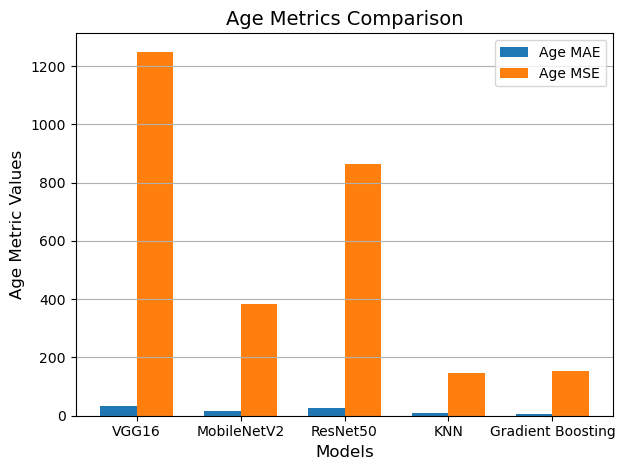

In [ ]:
# Set the positions and width for the age metrics bars
bar_width = 0.35
positions = np.arange(len(comparison_df['Model']))

# Plot Age MAE and Age MSE
plt.bar(positions, comparison_df['Age MAE'], width=bar_width, label='Age MAE', align='center')
plt.bar(positions + bar_width, comparison_df['Age MSE'], width=bar_width, label='Age MSE', align='center')

# Adding labels and title for Age Metrics
plt.xlabel('Models', fontsize=12)
plt.ylabel('Age Metric Values', fontsize=12)
plt.title('Age Metrics Comparison', fontsize=14)
plt.xticks(positions + bar_width / 2, comparison_df['Model'])
plt.legend()
plt.grid(axis='y')

# Show the plot for Age Metrics
plt.tight_layout()
plt.show()

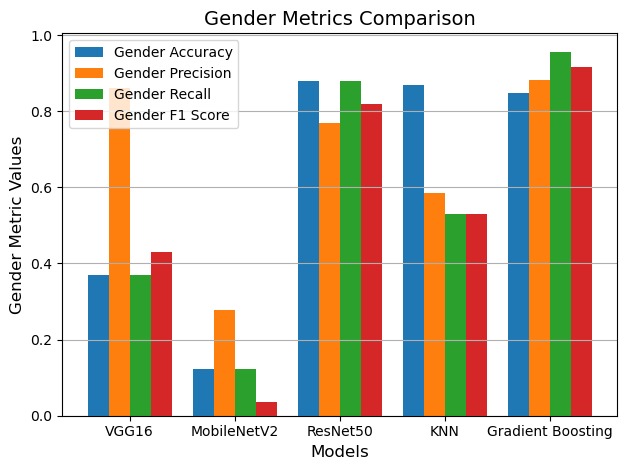

In [ ]:
# Plot Gender Accuracy, Precision, Recall, and F1 Score
bar_width = 0.2
plt.bar(positions, comparison_df['Gender Accuracy'], width=bar_width, label='Gender Accuracy', align='center')
plt.bar(positions + bar_width, comparison_df['Gender Precision'], width=bar_width, label='Gender Precision', align='center')
plt.bar(positions + 2 * bar_width, comparison_df['Gender Recall'], width=bar_width, label='Gender Recall', align='center')
plt.bar(positions + 3 * bar_width, comparison_df['Gender F1 Score'], width=bar_width, label='Gender F1 Score', align='center')

# Adding labels and title for Gender Metrics
plt.xlabel('Models', fontsize=12)
plt.ylabel('Gender Metric Values', fontsize=12)
plt.title('Gender Metrics Comparison', fontsize=14)
plt.xticks(positions + 1.5 * bar_width, comparison_df['Model'])
plt.legend()
plt.grid(axis='y')

# Show the plot for Gender Metrics
plt.tight_layout()
plt.show()

##Performing Statistical Test

In [ ]:
# Perform Kruskal-Wallis H Test for each metric
from scipy.stats import kruskal

metrics = ['Age MAE', 'Age MSE', 'Gender Accuracy', 'Gender Precision', 'Gender Recall', 'Gender F1 Score']
results = {}

for metric in metrics:
    # Group data by model for the current metric
    groups = [comparison_df[comparison_df['Model'] == model][metric].values for model in comparison_df['Model']]

    # Perform the Kruskal-Wallis test
    statistic, p_value = kruskal(*groups)
    results[metric] = {'Statistic': statistic, 'P-value': p_value}

# Print the results
for metric, result in results.items():
    print(f'{metric}: Statistic = {result["Statistic"]}, P-value = {result["P-value"]}')

Age MAE: Statistic = 4.0, P-value = 0.40600584970983794
Age MSE: Statistic = 4.0, P-value = 0.40600584970983794
Gender Accuracy: Statistic = 4.0, P-value = 0.40600584970983794
Gender Precision: Statistic = 4.0, P-value = 0.40600584970983794
Gender Recall: Statistic = 4.0, P-value = 0.40600584970983794
Gender F1 Score: Statistic = 4.0, P-value = 0.40600584970983794
